# Model Representation - Linear Regression (Univariate)

### Importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl


### Creating the training set as 1D Numpy arrays

In [2]:
# x_train is the input variable (size in 1000 square feet)
x_train = np.array([1.0, 2.0])

# y_train is the output variable (price in 1000 dollars)
y_train = np.array([300.0, 500.0])

# Plotting the data points
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

x_train: [1. 2.]
y_train: [300. 500.]


### Number of training examples m

In [3]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")

m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (2,)
Number of training examples is: 2


We can also use the len() python function to list the number of training examples

In [4]:
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


To access a value in a numpy array, we index the array with a desired offset. For example, to get location zero of x_train, we do the following:

In [5]:
i = 0 #location of the value we want to access

x_i = x_train[i]
y_i = y_train[i]

print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


### Plotting the data

We can use the scatter() function from matplotlib.

The function arguments "marker" and "c" show the points as red crosses.

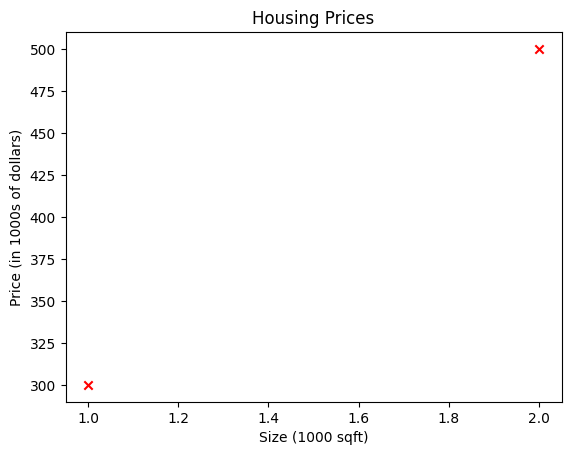

In [6]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')

# Title and labels
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()


### Model function

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> <br/> <br/> <br/> 
Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

In [7]:
w = 200
b = 100

print(f"w: {w}")
print(f"b: {b}")

w: 200
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.
> **Note**: The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
> **Note**: `np.zero(n)` will return a one-dimensional numpy array with $n$ entries   


In [8]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
        x (ndarray (m,)): Data, m examples 
        w,b (scalar): model parameters  
    Returns:
        f_wb (ndarray (m,)): model output
    """

    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

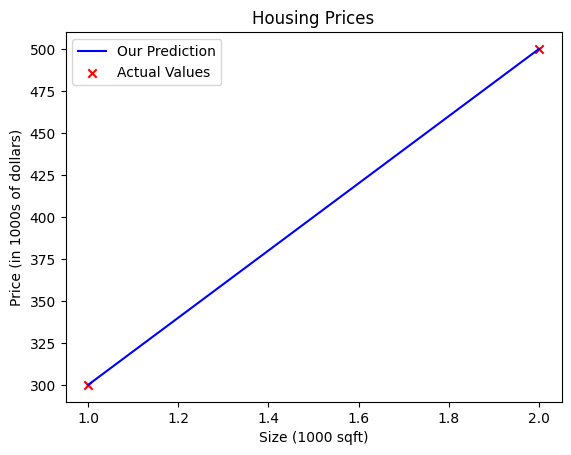

In [9]:
result = compute_model_output(x_train, w, b)

# Plotting the model output
plt.plot(x_train, result, c='b', label='Our Prediction')

# Plotting the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Setting the title and labels
plt.title("Housing Prices")
plt.ylabel("Price (in 1000s of dollars)")
plt.xlabel("Size (1000 sqft)")
plt.legend()
plt.show()



Now that we have a model, we can use it to make our original prediction. 

We can try with a house that has 1200 sqft. Since the units of x are in 1000's of sqft, x is 1.2.

In [10]:
w = 200
b = 100
x_i = 1.2
cost = w * x_i + b

print(f"${cost:.0f} thousand dollars")


$340 thousand dollars


## Cost Function

We can continue by using the same data points as before

The term 'cost' in this assignment might be a little confusing since the data is housing cost. Here, cost is a measure of how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

In [11]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [12]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray (m,)): Data, m examples 
        y (ndarray (m,)): target values
        w,b (scalar): model parameters  
    Returns:
        total_cost: (float): The cost of using w,b as the parameters for linear regression to fit the data points in x and y
    """
    #number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i])**2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

        

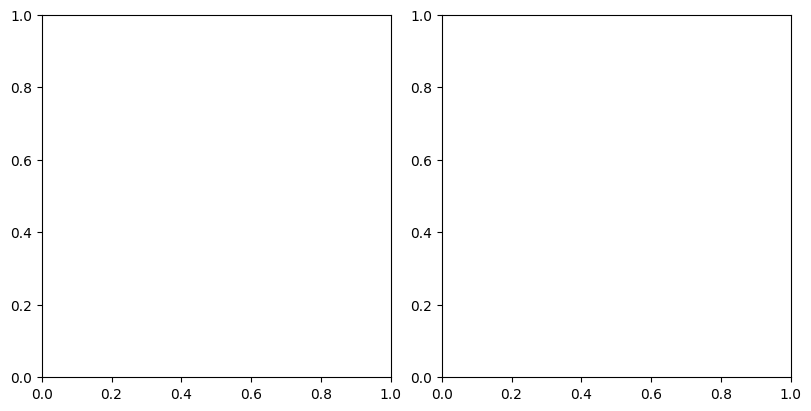

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

In [ ]:
plt_intuition(x_train,y_train) # Interactivity won't work in this environment, has to be run in Jupyterlab

In [15]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

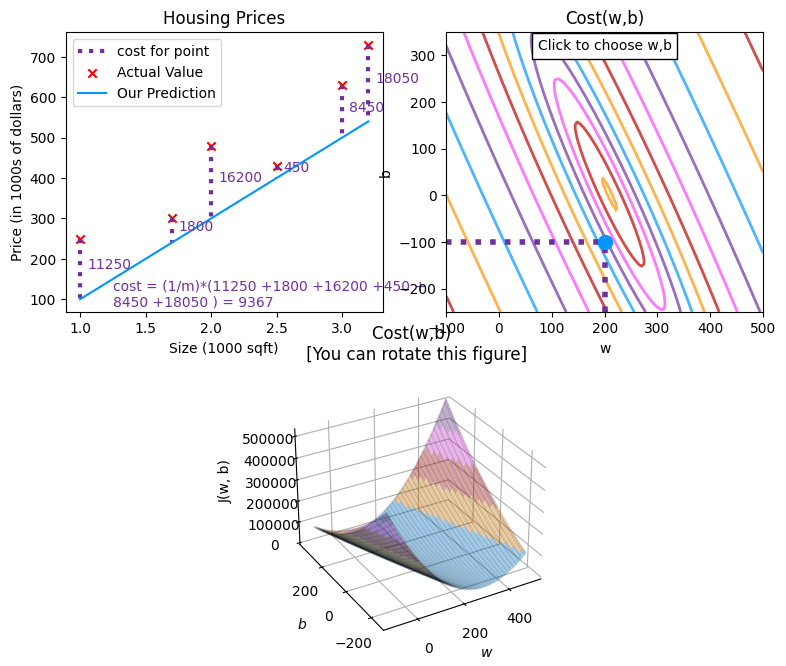

In [16]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

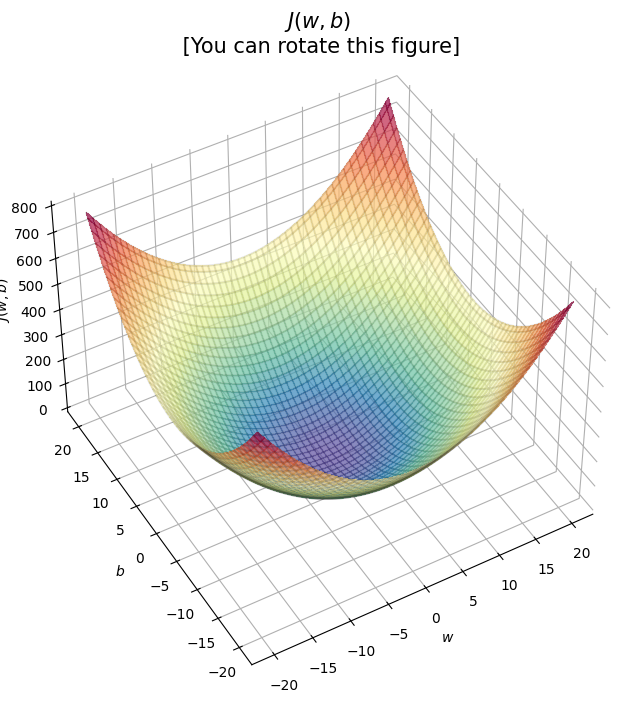

In [ ]:
soup_bowl() # Interactivity won't work in this environment, has to be run in Jupyterlab